<a href="https://colab.research.google.com/github/whdrns2013/Workspace_SeSSAC/blob/main/pythonDir/06_deeplearning/DL_01_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 숙제
* 학습률에 대한 공부 : 정의와 의의  
* 모델에서 층을 만들 때, Dense 말고 또 무엇이 있지??

# 딥러닝 수업 전 설명  
  
* 교재 : 백견불여일타  
* 환경 : 구글 코랩  
* 사용법 : 대부분 주피터 랩과 비슷하나, 단축키 부분은 조금 다름  
* 주의사항 : 런타임 -> 런타임 유형 -> GPU는 6~8시간 사용 후 24시간 대기  
* 때문에 불필요한 GPU 세션 연결은 지양  

## 구글 코랩
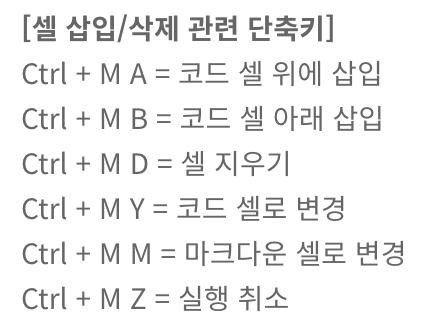

# 케라스  
  
* 파이썬 기반 머신러닝 라이브러리  
* 텐서플로우를 편하게 사용할 수 있도록 보조하는 역할  
* 텐서플로우 사용은 거의 모두 케라스를 통해 사용한다고 해도 과언이 아님  
(1) 높은 유연성  
(2) 명확한 예약어명으로 쉬운 사용  
... 등등의 장점  

In [ ]:
pwd
# 현재 디렉토리

'/content'

In [ ]:
# 판다스 임포트 해보기 = 주피터와 동일
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/칼럼 리스트.csv', encoding='cp949')

In [ ]:
data

,Unnamed: 0,0,칼럼명,칼럼 데이터타입
0,0,행정동코드,행정동코드,int64
1,1,자치구,자치구,object
2,2,행정동,행정동,object
3,3,성별,성별,int64
4,4,연령대,연령대,int64
...,...,...,...,...
138,138,배달_식재료 서비스 사용 미추정 인구수,배달_식재료 서비스 사용 미추정 인구수,int64
139,139,배달_식재료 서비스 사용일수,배달_식재료 서비스 사용일수,float64
140,140,"배달_식재료 서비스 사용일수: 4분위수, 25%","배달_식재료 서비스 사용일수: 4분위수, 25%",float64
141,141,"배달_식재료 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 50%",float64


In [ ]:
# 파이썬 버전 보기
import sys
sys.version

'3.8.16 (default, Dec  7 2022, 01:12:13) \n[GCC 7.5.0]'

In [ ]:
# 텐서플로우 임포트, 버전 보기
import tensorflow as tf
tf.__version__

'2.9.2'

# 딥러닝 개요  
  
* 딥러닝은 문제 정의 -> 데이터 준비 -> 학습, 튜닝의 반복이다.

> <b>문제 정의</b>  
> 가장 중요한 것은 문제 정의이다.  
> 어떤 문제인지, 다루는 데이터의 유형은 어떠한지 등  
> 이러한 준비들이 되어야 명확한 처리가 가능  
  
> <b>학습 하기</b>  
> 선택한 모델이 현 문제에 어울리는 모델인지  
> 손실함수와 los는 어떻게 할 것인지 등..
> 에 대한 파악 필요  
  
> <b>추론 및 평가</b>  
> 이후 학습한 모델에 대한 평가 필요  
  
## 딥러닝 용어  
> <b>데이터 준비하기</b>  
> * 클래스 불균형 : 은행 거래 사기, 희귀질병 등. 클래스간 자료 양이 불균형이 있는 경우  
> * under sampling : 과소 표집. 클래스 불균형에서 작은 쪽의 클래스의 데이터양에 양을 맞추는 것.  
> * over sampling : 과대 표집. 클래스 불균형에서 큰 쪽의 클래스의 데이터양에 맞추는 것.  
  
> <b>모델 학습</b>  
> * 분류 :  
> * 회귀 :  
> * 이진 분류 : 타겟의 범주가 두 가지인 분류의 형태 (선택은 하나)  
> * 다중 분류 : 타겟의 범주가 여러 개인 분류의 형태 (선택은 하나)  
> * 다중 레이블 분류 :  타겟의 범주가 여러개이고, 선택 또한 여러개 하는 경우.

> <b>전처리, 파라미터</b>  
> * 원핫 인코딩 : 수치형이 아닌 자료를 수치형으로 표시하는 인코딩 방법으로, 여러 개의 클래스를 각각 칼럼으로 잡은 후, 해당하면 1, 해당하지 않으면 0으로 표기하는 방법  
> * 레이블 인코딩 : 딥러닝에서는 일반적으로 레이블 인코딩은 지양한다. 레이블 인코딩시에는 모델이 인코딩 후 숫자값 크기에 영향을 받을 수 있기 때문.  
> * 하이퍼 파라미터 : 사람이 직접 설정해줘야 하는 파라미터 값. 학습률, 배치 크기, 에폭 등..  
> * 드롭아웃 : 고의로 학습데이터를 누락시키는 것. 과적합 방지를 위해 진행한다.  
  
> <b>에폭과 스텝</b>  
> * 에폭 : 전체 데이터를 사용해 학습하는 횟수. 전체 데이터를 1번 반복하면 1에폭임. 10회 반복은 10 에폭  

> <b>과대적합과 과소적합</b>  
> * 과대적합 : 훈련데이터에 너무 적합하게 모델이 만들어진 경우  
> * 과대적합은 드롭아웃 등을 통해 방지를 한다.
  
> 평가  
> * 정밀도, 정확도, F1스코어 등, 머신러닝에서 사용했던 평가 지표를 동일하게 사용한다.

## 기본 연산 해보기  
  
* 텐서플로우 : 텐서(다차원) 플로우(흐름)  - 다차원의 흐름.  
* 다차원이기 때문에 기본적으로 사용하기 어려우나,  
* 케라스의 지원을 통해 사용하기 쉬워졌음  
* 텐서플로우의 기본 자료형은 numpy의 배열 형태 (데이터타입은 다양할 수 있으나, 보통 인코딩 등을 통해 숫자로 사용함)   


In [14]:
# 텐서플로우 임포트
import tensorflow as tf

In [18]:
a = tf.constant(2)
print(a)
print(tf.rank(a))
# 0차원의 형태

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [17]:
b = tf.constant([1, 2])
print(tf.rank(b))
# 1차원의 형태

tf.Tensor(1, shape=(), dtype=int32)


## 신경망  

### 퍼셉트론  
![](https://heung-bae-lee.github.io/image/perceptron_basic.png)
* 신경망은 퍼셉트론 알고리즘으로부터 시작함  
* 퍼셉트론 알고리즘 : 여러 개의 입력 신호를 받아, 하나의 출력 신호로 출력하는 것.  
* x는 입력, y는 출력, w는 가중치.  
* 각각의 입력값 x들에 대해 가중치를 준 후, 활성화 함수를 통해 출력을 하거나 하지 않거나 한다.  
* 활성화함수 : 출력값을 다음으로 전달 할지 말지를 결정하는 함수로, 임계값으로 대표될 수 있다. 퍼셉트론에서 출력값이 임계값을 넘으면 전달되고, 넘지 않으면 전달되지 않는다.  
  
> <b>활성화 함수</b>  
> * 계단 함수 (step function): 단순히 0과 1을 출력하는 활성화 함수.  

In [1]:
import tensorflow as tf
tf.random.set_seed(777)
## random state와 같이 난수 생성 규칙을 정의하는 것

In [2]:
import numpy as np
from keras.models import Sequential # Sequential 모델
from keras.layers import Dense
from keras.optimizers import SGD # 확률적 경사하강법
from keras.losses import mse # mean squared error 평가 지표

In [3]:
# 데이터 만들기
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[1]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))
## Dense : 완전 연결층. 모든 입력값들에 대해 연결을 하는 층이다. / 다른 것은
## 모델에 Dense 층 1개를 만든다는 코드이다.  
## input shape 들어오는 값의 형태는 2, x 행렬의 형태 
## activation 활성화 함수 = linear  


# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])
model.fit(x, y, epochs = 500)
## 옵티마이저는 경사하강법,
## 로스 측정은 mse 방식
## 평가 지표는 acc, 정확도
## 에폭(학습 횟수)은 500

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 31ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss